In [43]:
import urllib.request
urllib.request.urlretrieve ("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz", "a.tar.gz")


('a.tar.gz', <http.client.HTTPMessage at 0x7f7848b97e10>)

In [0]:
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [0]:
#importing required libraries

#image precessing
import cv2
#file handling
import os
#obvious
import numpy as np
import pandas as pd
#library to know the progress of or loops
from tqdm import tqdm

In [47]:
name,count = np.unique(test_labels,return_counts=True)
print(count)

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [0]:
x_train = train_data
x_test = test_data

In [49]:
train_labels


array([6, 9, 9, ..., 9, 1, 1])

In [0]:
# #creating y
# def func(a):
#   y = []
#   for name in a:
#     if name == 0:
#       y.append((1,0,0,0,0,0,0,0,0,0))
#     elif name == 1:
#       y.append((0,1,0,0,0,0,0,0,0,0))
#     elif name == 2:
#       y.append((0,0,1,0,0,0,0,0,0,0))
#     elif name == 3:
#       y.append((0,0,0,1,0,0,0,0,0,0))
#     elif name == 4:
#       y.append((0,0,0,0,1,0,0,0,0,0))
#     elif name == 5:
#       y.append((0,0,0,0,0,1,0,0,0,0))
#     elif name == 6:
#       y.append((0,0,0,0,0,0,1,0,0,0))
#     elif name == 7:
#       y.append((0,0,0,0,0,0,0,1,0,0))
#     elif name == 8:
#       y.append((0,0,0,0,0,0,0,0,1,0))
#     elif name == 9:
#       y.append((0,0,0,0,0,0,0,0,0,1))
#   return np.array(y)


In [50]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(train_labels)
y_test = encoder.transform(test_labels)
encoder.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# y_train = func(train_labels)
# y_test = test_labels

In [0]:
x_train = x_train / 255
x_test = x_test / 255

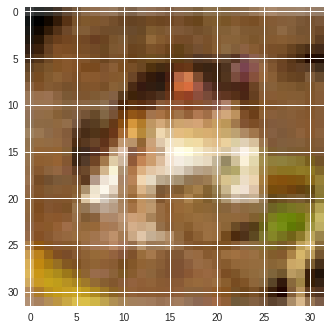

In [53]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [54]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
#importing keras and required layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
#binary classification model(cats and dogs)
nClasses = 10

In [0]:
#constructing the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nClasses, activation='softmax'))

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [64]:
model.fit(x_train,y_train,epochs =50,batch_size = 100)

Epoch 1/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.2105 - acc: 0.9264
Epoch 2/50
50000/50000 [==============================] - 21s 410us/step - loss: 0.2148 - acc: 0.9259
Epoch 3/50
50000/50000 [==============================] - 20s 392us/step - loss: 0.2151 - acc: 0.9238
Epoch 4/50
50000/50000 [==============================] - 19s 387us/step - loss: 0.2086 - acc: 0.9295
Epoch 5/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.2081 - acc: 0.9290
Epoch 6/50
50000/50000 [==============================] - 18s 365us/step - loss: 0.2045 - acc: 0.9304
Epoch 7/50
50000/50000 [==============================] - 18s 354us/step - loss: 0.2030 - acc: 0.9290
Epoch 8/50
50000/50000 [==============================] - 18s 351us/step - loss: 0.2044 - acc: 0.9290
Epoch 9/50
50000/50000 [==============================] - 17s 340us/step - loss: 0.2053 - acc: 0.9299
Epoch 10/50
50000/50000 [==============================] - 16s 326us/step - loss: 

In [65]:
loss, acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 168us/step


In [66]:
print(acc)

0.8126


In [67]:
loss2, acc2 = model.evaluate(x_train,y_train)

50000/50000 [==============================] - 10s 191us/step


In [68]:
print(acc2)

0.99668
